# Algorithmic trading with python (using LSTM)

We use a Long Short Time Memory recurrent neural network to develop a good trading strategy for the S&P 500 index.


# First we import all required libraries 

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mkmah\anaconda3\envs\en_2\lib\site-packages\tensorflow\python\frame

## Part 1: Get the data 

We used Yahoo Finance to get the data




In [2]:
import yfinance as yf
import plotly.graph_objs as go
import pandas_datareader as pdr

In [3]:
start_date=datetime.datetime(2021,6,11) #define start date to get the data
end_date=datetime.date.today() # today data to get data of today

here we will use the data of last six month because if we take data the large data then our prediction stock price will wrong 
because mostly company's stock grow in last some year so by large data mostly predicted price will be low .

In [4]:
df = pdr.get_data_yahoo('CIPLA.NS', start=start_date, end=end_date) 
df.drop("Adj Close",axis=1,inplace=True) #drop the Adj Close columns
df.to_csv("data.csv") #save data to csv file 

In [5]:
df.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2021-11-30,984.000000,958.599976,965.000000,971.299988,4771579.0
2021-12-01,986.700012,921.849976,980.750000,928.150024,3879683.0
2021-12-02,937.950012,917.500000,937.950012,921.250000,2749084.0
2021-12-03,930.000000,908.299988,930.000000,912.049988,2388529.0
2021-12-06,915.799988,892.500000,915.099976,894.950012,1572284.0


# Historical Data Visualization

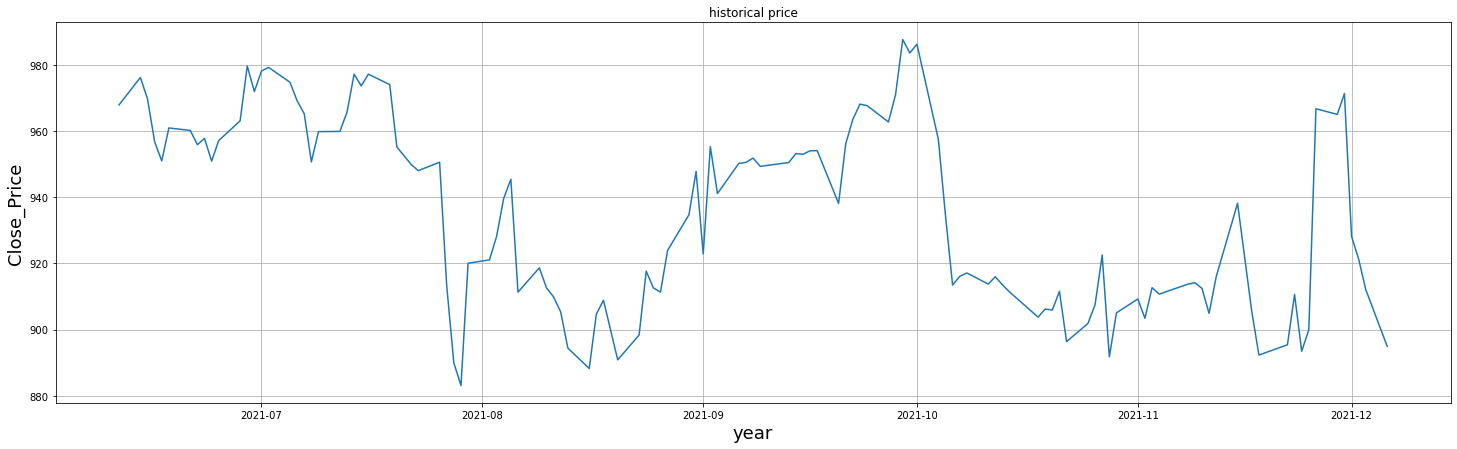

In [6]:
plt.figure(figsize=(25,7))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('year', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.grid()
plt.show()

In [7]:
df1=df.reset_index()['Close'] #define a dataframe with only previous closing price

In [8]:
df1

0      967.849976
1      976.150024
2      969.700012
3      956.750000
4      950.950012
          ...    
116    971.299988
117    928.150024
118    921.250000
119    912.049988
120    894.950012
Name: Close, Length: 121, dtype: float64

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.81100478]
 [0.89043109]
 [0.82870848]
 [0.70478492]
 [0.64928265]
 [0.74449807]
 [0.73732104]
 [0.69617225]
 [0.7143543 ]
 [0.6488043 ]
 [0.70813397]
 [0.76507189]
 [0.92344498]
 [0.84976123]
 [0.90909091]
 [0.91961758]
 [0.87655537]
 [0.82296651]
 [0.78564628]
 [0.64641195]
 [0.73397141]
 [0.73444976]
 [0.78995262]
 [0.90000047]
 [0.86602871]
 [0.90000047]
 [0.86985669]
 [0.68947415]
 [0.63923492]
 [0.62105287]
 [0.64545466]
 [0.28708134]
 [0.06507224]
 [0.        ]
 [0.35358863]
 [0.36315801]
 [0.43110095]
 [0.54114879]
 [0.59617272]
 [0.26985658]
 [0.34019185]
 [0.28229665]
 [0.25598086]
 [0.21244031]
 [0.10813444]
 [0.04928253]
 [0.20622056]
 [0.24641148]
 [0.07416268]
 [0.14593301]
 [0.33062248]
 [0.28229665]
 [0.26985658]
 [0.39043109]
 [0.49378025]
 [0.61913887]
 [0.38038278]
 [0.69043086]
 [0.55502392]
 [0.64210561]
 [0.64497631]
 [0.65741638]
 [0.63349294]
 [0.64449796]
 [0.6703354 ]
 [0.6684214 ]
 [0.67846913]
 [0.67894749]
 [0.52631579]
 [0.69856459]
 [0.76937822]
 [0.81

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9) # set 90% data is equal to train 
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(108, 13)

In [13]:
train_data

array([[0.81100478],
       [0.89043109],
       [0.82870848],
       [0.70478492],
       [0.64928265],
       [0.74449807],
       [0.73732104],
       [0.69617225],
       [0.7143543 ],
       [0.6488043 ],
       [0.70813397],
       [0.76507189],
       [0.92344498],
       [0.84976123],
       [0.90909091],
       [0.91961758],
       [0.87655537],
       [0.82296651],
       [0.78564628],
       [0.64641195],
       [0.73397141],
       [0.73444976],
       [0.78995262],
       [0.90000047],
       [0.86602871],
       [0.90000047],
       [0.86985669],
       [0.68947415],
       [0.63923492],
       [0.62105287],
       [0.64545466],
       [0.28708134],
       [0.06507224],
       [0.        ],
       [0.35358863],
       [0.36315801],
       [0.43110095],
       [0.54114879],
       [0.59617272],
       [0.26985658],
       [0.34019185],
       [0.28229665],
       [0.25598086],
       [0.21244031],
       [0.10813444],
       [0.04928253],
       [0.20622056],
       [0.246

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
#define x_train,y_tran and x_test,y_test
time_step =10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape)
print(y_train.shape)

(97, 10)
(97,)


In [17]:
print(X_test.shape)
print(ytest.shape)

(2, 10)
(2,)


In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Define LSTM Model

In [19]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary() #visualization of model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Train the Model 

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=60,verbose=1)

Train on 97 samples, validate on 2 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
97/97 [==============================] - 3s 31ms/sample - loss: 0.2865 - val_loss: 0.0649
Epoch 2/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.2107 - val_loss: 0.0341
Epoch 3/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.1419 - val_loss: 0.0103
Epoch 4/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.0799 - val_loss: 0.0042
Epoch 5/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.0493 - val_loss: 0.0269
Epoch 6/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.0731 - val_loss: 0.0382
Epoch 7/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.0762 - val_loss: 0.0238
Epoch 8/100
97/97 [==============================] - 0s 2ms/sample - loss: 0.0570 - val_loss: 0.0104
Epoch 9/100
97/97 [==============================] - 0

# Prediction Step

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
train_predict.shape

(97, 1)

In [24]:
test_predict.shape

(2, 1)

In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
#### Train Data RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


933.7079562410888

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

949.0623500052513

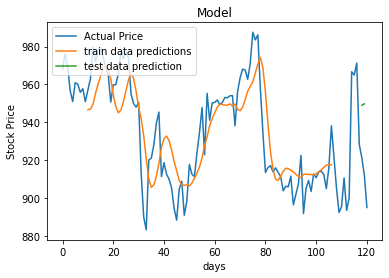

<Figure size 432x288 with 0 Axes>

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.title("Model")
plt.xlabel("days")
plt.ylabel("Stock Price")
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Price', 'train data predictions','test data prediction'], loc = 'upper left')


plt.show()
plt.savefig("prediction.jpg")

# Define an  strategy for next 30 days stock prediction 

In [29]:
len(test_data)

13

In [30]:
x_input=test_data[len(test_data)-10:].reshape(1,-1)
x_input.shape

(1, 10)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
len(temp_input)

10

In [33]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=10
i=0

#in this loop first loop else will run and predict the next 1 day price
#and we add that 1 day price to temp_input
#so temp_input will increse by 1 and "if" loop will run and it take again data from 1st data to end 
#and so on this while run runs for 30 times and each time it predict the price of next day


while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.4564570188522339], [0.3825814723968506], [0.332436203956604], [0.3071175515651703], [0.3302735686302185], [0.3519230782985687], [0.37563401460647583], [0.38563990592956543], [0.396047979593277], [0.4047897756099701], [0.4073827862739563], [0.42277976870536804], [0.43453744053840637], [0.4436030089855194], [0.4507959485054016], [0.4579275846481323], [0.46488824486732483], [0.4717599153518677], [0.4779784679412842], [0.4836149513721466], [0.4886455833911896], [0.49282151460647583], [0.4967849850654602], [0.5004020929336548], [0.5035995841026306], [0.5063502788543701], [0.5087143778800964], [0.5107413530349731], [0.5124828219413757], [0.5139609575271606]]


In [34]:
#define price at 30th day
price_at_30th_day = scaler.inverse_transform([lst_output[-1]]).item(0)

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,101+30)

In [36]:
len(lst_output)

30

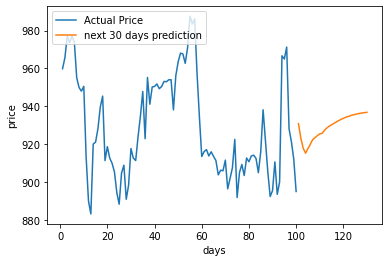

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel("days")
plt.ylabel("price")
plt.legend(['Actual Price', 'next 30 days prediction'], loc = 'upper left')

plt.show
plt.savefig("next_30 days.jpg")

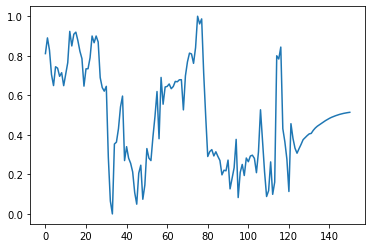

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [40]:
df3=scaler.inverse_transform(df3).tolist()

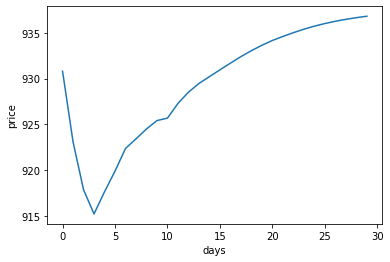

<Figure size 432x288 with 0 Axes>

In [42]:
plt_of_next_30days=plt.plot(df3[len(df3)-30:])
plt.xlabel("days")
plt.ylabel("price")
plt_of_next_30days
plt.show()
plt.savefig("only_next_30_days.jpg")

In [43]:
price_at_30th_day

936.8088956475257

this is our model for 1 companies 
now we will run this model to S&P 500 
and predict the future price of all company's and calculate the total return in end of next month according to our model prediction model 